In [2]:
import pandas as pd

cols = ['surgery?', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate','temperature_of_extremities', 'pain', 'outcome']
df = pd.read_csv('C:\\Users\\ilyak\\Desktop\\Python\\Python_projects\\Материалы\\horse_data.csv',
                 header=None, na_values='?', usecols = [0, 1, 3, 4, 5, 6, 10, 22], names = cols)
df

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

в столбце Age есть значения 9, которые лежат вне интервала возможных значений (1,2), предположим, что это неправильное распознавание значения 2, так как его в датафрейме изначально нет, заменим 9 на на 2.

'rectal_temperature', 'pulse', 'respiratory_rate' - количественные, рассчитаем базовые статистики

'surgery?', 'Age','temperature_of_extremities', 'pain', 'outcome' - категориальные, рассчитаем частотный анализ и критерии сопоставления групп, проверим уникальные значения категорий на предмет ошибок.

In [3]:
df.loc[(df['Age'] == 9), 'Age'] = 2
df

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [4]:
df.describe()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.080000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,0.271746,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


Max and min

In [5]:
maximum_rectal_temperature = df['rectal_temperature'].max()
maximum_pulse = df['pulse'].max()
maximum_respiratory_rate = df['respiratory_rate'].max()
minimun_rectal_temperature = df['rectal_temperature'].min()
minimun_pulse = df['pulse'].min()
minimun_respiratory_rate = df['respiratory_rate'].min()
print(f'Максимальная ректальная температура: {maximum_rectal_temperature}\n'
      f'максимальный пульс: {maximum_pulse}\n '
      f'максимальная частота дыхания: {maximum_respiratory_rate}\n'
      f'минимальная ректальная температура: {minimun_rectal_temperature}\n'
      f'минимальный пульс: {minimun_pulse}\n '
      f'минимальная частота дыхания: {minimun_respiratory_rate}')

Максимальная ректальная температура: 40.8
максимальный пульс: 184.0
 максимальная частота дыхания: 96.0
минимальная ректальная температура: 35.4
минимальный пульс: 30.0
 минимальная частота дыхания: 8.0


Размах -
разность между наибольшим и наименьшим значениями показателя

In [6]:
rectal_temperature_range = maximum_rectal_temperature - minimun_rectal_temperature
pulse_range = maximum_pulse - minimun_pulse
respiratory_rate_range = maximum_respiratory_rate - minimun_respiratory_rate
print(f'Размах ректальной температуры: {rectal_temperature_range:.3f}\n'
      f'Размах пульса: {pulse_range}\n '
      f'Размах частоты дыхания: {respiratory_rate_range}')


Размах ректальной температуры: 5.400
Размах пульса: 154.0
 Размах частоты дыхания: 88.0


Среднее арифметическое - частное от деления суммы всех чисел ряда на их количество

In [7]:
rectal_temperature_mean = df['rectal_temperature'].mean()
pulse_mean = df['pulse'].mean()
respiratory_rate_mean = df['respiratory_rate'].mean()
print(f'Среднее арифметическое ректальной температуры: {rectal_temperature_mean:.6f}\n'
      f'Среднее арифметическое пульса: {pulse_mean:.6f}\n '
      f'Среднее арифметическое частоты дыхания: {respiratory_rate_mean:.6f}')

Среднее арифметическое ректальной температуры: 38.167917
Среднее арифметическое пульса: 71.913043
 Среднее арифметическое частоты дыхания: 30.417355


Медиана -
число, половина из элементов выборки больше которого, а другая половина – меньше

In [8]:
rectal_temperature_median = df['rectal_temperature'].median()
pulse_median = df['pulse'].median()
respiratory_rate_median = df['respiratory_rate'].median()
print(f'Медиана ректальной температуры: {rectal_temperature_median:.3f}\n'
      f'Медиана пульса: {pulse_median:.3f}\n '
      f'Медиана частоты дыхания: {respiratory_rate_median:.3f}')

Медиана ректальной температуры: 38.200
Медиана пульса: 64.000
 Медиана частоты дыхания: 24.500


СКО:
измеряется в единицах самой случайной величины и используется при расчете стандартной ошибки среднего арифметического, при построении доверительных интервалов, при статистической проверке гипотез, при измерении линейной взаимосвязи между случайными величинами. Является корнем из дисперсии.

In [9]:
rectal_temperature_std = df['rectal_temperature'].std()
pulse_std = df['pulse'].std()
respiratory_rate_std = df['respiratory_rate'].std()
print(f'СКО ректальной температуры: {rectal_temperature_std:.6f}\n'
      f'СКО пульса: {pulse_std:.6f}\n '
      f'СКО частоты дыхания: {respiratory_rate_std:.6f}')

СКО ректальной температуры: 0.732289
СКО пульса: 28.630557
 СКО частоты дыхания: 17.642231


Дисперсия: 
просто квадрат стандартного отклонения. Во многих статистических формулах удобнее использовать СКО, а не извлекать каждый раз корень из дисперсии.

In [10]:
%%time
rectal_temperature_var = df['rectal_temperature'].var()
pulse_var = df['pulse'].var()
respiratory_rate_var = df['respiratory_rate'].var()
print(f'Дисперсия ректальной температуры: {rectal_temperature_var:.6f}\n'
      f'Дисперсия пульса: {pulse_var:.6f}\n '
      f'Дисперсия частоты дыхания: {respiratory_rate_var:.6f}')

Дисперсия ректальной температуры: 0.536247
Дисперсия пульса: 819.708775
 Дисперсия частоты дыхания: 311.248328
CPU times: total: 0 ns
Wall time: 993 μs


Решил узнать быстрее ли решить это через numpy.var()

In [11]:
%%time
import numpy as np
rectal_t = np.var(df['rectal_temperature'], ddof=1)
pulse = np.var(df['pulse'], ddof=1)
respiratory_rate = np.var(df['respiratory_rate'], ddof=1)
print(f'Дисперсия ректальной температуры: {rectal_t:.6f}\n'
      f'Дисперсия пульса: {pulse:.6f}\n '
      f'Дисперсия частоты дыхания: {respiratory_rate:.6f}')

Дисперсия ректальной температуры: 0.536247
Дисперсия пульса: 819.708775
 Дисперсия частоты дыхания: 311.248328
CPU times: total: 15.6 ms
Wall time: 999 μs


Первый и третий квантили:

Меры разброса характеризуют степень индивидуальных отклонений величины от среднего. Квантили (процентили) - это значение, ниже (выше) которого попадает определенный процент наблюдений отсортированной выбокрке.

0.25-квантиль называется первой (или нижней) квартилью
0.5-квантиль называется второй квартилью (это же тоже самое, что медиана!)
0.75-квантиль называется третьей (или верхней) квартилью.

Межквартильный размах:
это разница между 1-м и 3-м квартилями, т.е. между 25-м и 75-м процентилями.

In [12]:
Q_1_rect = df['rectal_temperature'].quantile(0.25)
Q_3_rect = df['rectal_temperature'].quantile(0.75)
IQR_rect = Q_3_rect - Q_1_rect
print(f'IQR ректальной температуры: {Q_1_rect:.3f}')

Q_1_pulse = df['pulse'].quantile(0.25)
Q_3_pulse = df['pulse'].quantile(0.75)
IQR_pulse = Q_3_pulse - Q_1_pulse
print(f'IQR пульса: {Q_1_pulse:.3f}')

Q_1_resp = df['respiratory_rate'].quantile(0.25)
Q_3_resp = df['respiratory_rate'].quantile(0.75)
IQR_resp = Q_3_resp - Q_1_resp
print(f'IQR частоты дыхания: {Q_1_resp:.3f}')

IQR ректальной температуры: 37.800
IQR пульса: 48.000
IQR частоты дыхания: 18.500


<Axes: xlabel='rectal_temperature', ylabel='Count'>

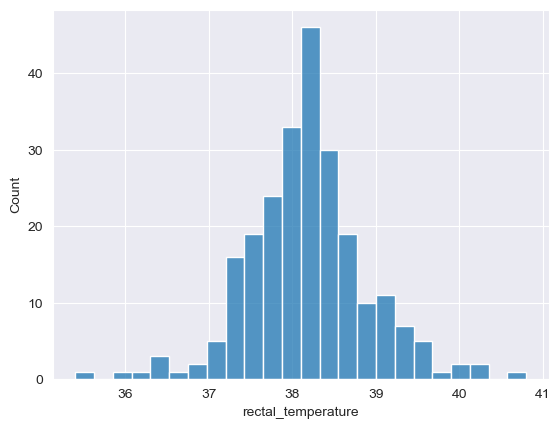

In [13]:
import seaborn as sns
sns.histplot(x = 'rectal_temperature', data = df)

<Axes: xlabel='pulse', ylabel='Count'>

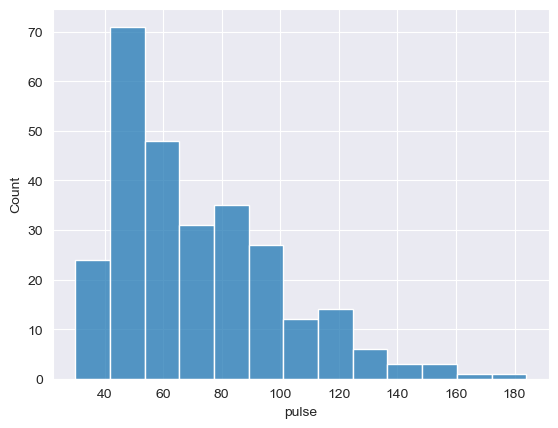

In [14]:

sns.histplot(x = 'pulse', data = df)

<Axes: xlabel='respiratory_rate', ylabel='Count'>

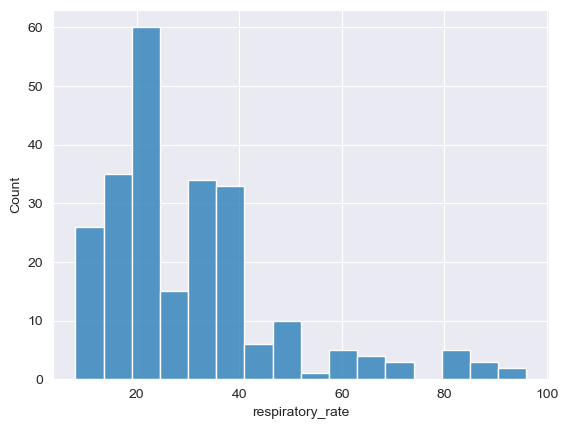

In [15]:
sns.histplot(x = 'respiratory_rate', data = df)

<Axes: xlabel='rectal_temperature'>

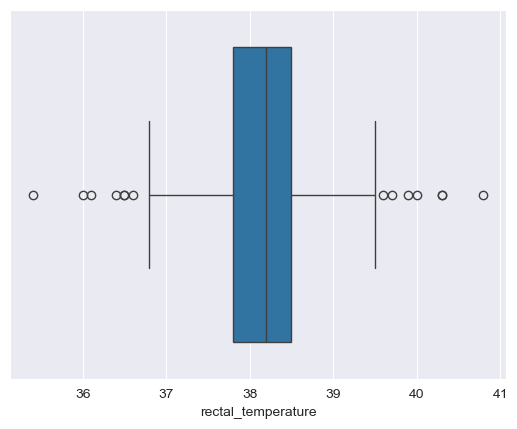

In [16]:
sns.boxplot(x = 'rectal_temperature', data = df)

<Axes: xlabel='pulse'>

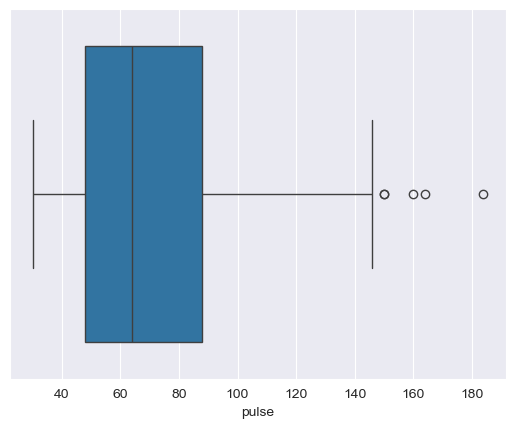

In [17]:
sns.boxplot(x = 'pulse', data = df)

<Axes: xlabel='respiratory_rate'>

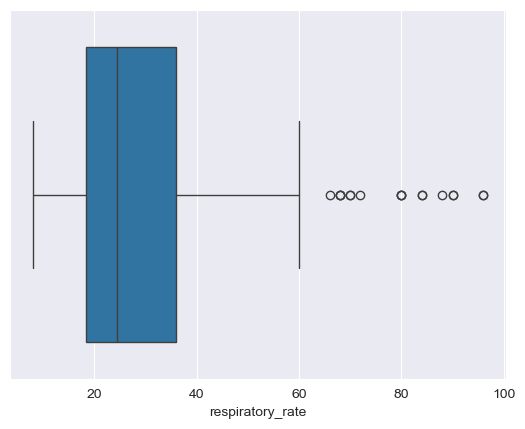

In [18]:
sns.boxplot(x = 'respiratory_rate', data = df)


<Axes: xlabel='rectal_temperature', ylabel='pulse'>

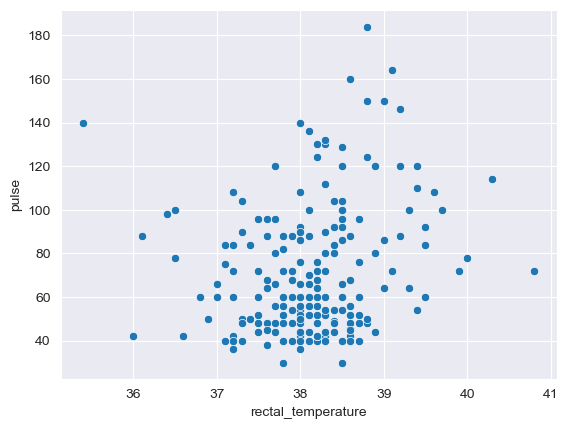

In [19]:
sns.scatterplot(x = 'rectal_temperature', y = 'pulse', data = df)

<Axes: xlabel='rectal_temperature', ylabel='respiratory_rate'>

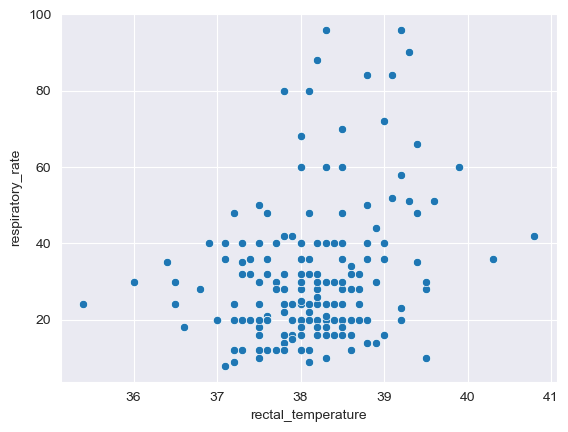

In [20]:
sns.scatterplot(x = 'rectal_temperature', y = 'respiratory_rate', data = df)

<Axes: xlabel='pulse', ylabel='respiratory_rate'>

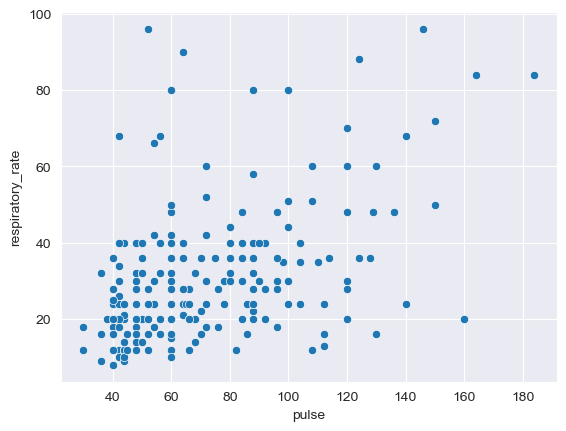

In [21]:
sns.scatterplot(x = 'pulse', y = 'respiratory_rate', data = df)

Выбросы:

Выбросы (outliers) результаты измерения, сильно выделяющиеся в общей выборке. Наиболее простой из методов обнаружения выбросов основан на межквартильном размахе (т.е. все, что не попадает в указанные диапазоны, является выбросом).

Наиболее распространенные причины выбросов в наборе данных:

Ошибки ввода данных (человеческий фактор)

Погрешности измерения (ошибки приборов)

Преднамеренное (например, сделанные для проверки методов обнаружения оборудованием)

Ошибки обработки данных

Ошибки выборки (извлечение или смешивание данных из неправильных или различных источников)

Естественные выбросы (не ошибки, а реальные исключительные наблюдения в данных)

In [22]:
lower_bound_rect = Q_1_rect - 1.5 * IQR_rect
upper_bound_rect = Q_3_rect + 1.5 * IQR_rect

lower_bound_pulse = Q_1_pulse - 1.5 * IQR_pulse
upper_bound_pulse = Q_3_pulse + 1.5 * IQR_pulse

lower_bound_resp = Q_1_resp - 1.5 * IQR_resp
upper_bound_resp = Q_3_resp + 1.5 * IQR_resp

remove_outliers = df[(df['rectal_temperature'].between(lower_bound_rect, upper_bound_rect,inclusive='both')) & 
                     (df['pulse'].between(lower_bound_pulse, upper_bound_pulse,inclusive='both')) & 
                     (df['respiratory_rate'].between(lower_bound_resp, upper_bound_resp,inclusive='both'))]
remove_outliers

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
6,1.0,1,37.9,48.0,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
292,1.0,1,37.0,66.0,20.0,1.0,4.0,2.0
294,2.0,1,38.5,40.0,16.0,1.0,2.0,1.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0


In [23]:
df_surgery = df['surgery?'].value_counts()
print(df_surgery, '\n')

df_Age = df['Age'].value_counts()
print(df_Age, '\n')

df_t = df['temperature_of_extremities'].value_counts()
print(df_t, '\n')

df_pain = df['pain'].value_counts()
print(df_pain, '\n')

df_outcome = df['outcome'].value_counts()
print(df_outcome, '\n')

surgery?
1.0    180
2.0    119
Name: count, dtype: int64 

Age
1    276
2     24
Name: count, dtype: int64 

temperature_of_extremities
3.0    109
1.0     78
2.0     30
4.0     27
Name: count, dtype: int64 

pain
3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: count, dtype: int64 

outcome
1.0    178
2.0     77
3.0     44
Name: count, dtype: int64 



Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

Гипотеза
Проверим взаимосвязь между столбцами pain и outcome с группировкой по возрасту лошади. Можно сделать вывод, что молодые лошади при коликах погибают. Взрослые лошади при низком уровне боли (до 4) остются живыми, а с 4 уровня боли, погибают все лошади. Признаем эту гипотезу допустимой, поэтому недостающие значения в столбце outcome заполняеем исходя из значения столбца pain.

In [24]:
df.isna().sum()

surgery?                       1
Age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        1
dtype: int64

In [25]:
df['outcome'] = df['outcome'].fillna(df['pain'])
df

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,2,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


In [26]:
df.isna().sum()

surgery?                       1
Age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        0
dtype: int64

<Axes: xlabel='Age', ylabel='pain'>

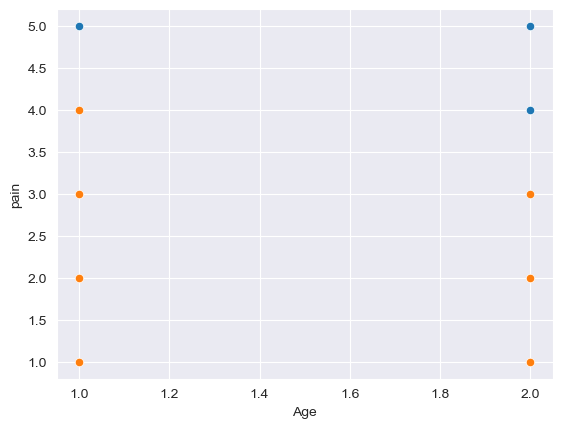

In [27]:
sns.scatterplot(x = 'Age', y = 'pain', data = df)
sns.scatterplot(x = 'Age', y = 'outcome', data = df)

Гипотеза:
Проверим взаимосвязь между столбцами surgery?(операция) и pain (боль)


Связь есть - операция была (1) при высоком медианном значении боли (3), и не было (2) при низком значении боли (2).

Заполним недостающие значениями столбца pain на основе медианных значений surgery

In [46]:
fill_df = df
print(fill_df.groupby(['surgery?'])['pain'].median())
(
      fill_df['pain']
      .fillna(fill_df.groupby(['surgery?'])['pain']   
      .transform('median'), inplace=True)
)

fill_df.isna().sum()

surgery?
1.0    3.0
2.0    2.0
Name: pain, dtype: float64


surgery?                      0
Age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64

В подтверждение гипотезы проверим обратную взаимосвязь между столбцами pain и surgery?

Связь есть, на уровнях боли 3 и выше, было хирургическое вмешательство. Восстановим отсутствующее значение в столбце 'surgery?'

In [35]:
print(fill_df.groupby(['pain'])['surgery?'].median())
(
      fill_df['surgery?']
      .fillna(fill_df.groupby(['pain'])['surgery?']
      .transform('median'), inplace=True)

)

fill_df.isna().sum()

pain
1.0    2.0
2.0    2.0
3.0    1.0
4.0    1.0
5.0    1.0
Name: surgery?, dtype: float64


C:\Users\ilyak\AppData\Local\Temp\ipykernel_82360\3444155859.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_df['surgery?'].fillna(fill_df.groupby(['pain'])['surgery?'].transform('median'), inplace=True)


surgery?                       0
Age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                           0
outcome                        0
dtype: int64

Гипотеза:
Проверим взаимосвязь между outcome и temperature_of_extremities

Выявлена связь, в случаях смертности (outcome = 2 или 3), температура конечностей (temperature of extremities) всегда была 3 (это признак шока).

В случае если outcome = 1 (лошадь осталась живой), температура конечностей = 2 (норма).

Восстановим отсутствующие значения в столбце 'temperature_of_extremities'


In [39]:
print(df.groupby(['outcome'])['temperature_of_extremities'].median())
(
      fill_df['temperature_of_extremities']
      .fillna(fill_df.groupby(['outcome'])['temperature_of_extremities']
      .transform('median'), inplace=True)
)

fill_df.isna().sum()

outcome
1.0    2.0
2.0    3.0
3.0    3.0
4.0    3.0
Name: temperature_of_extremities, dtype: float64


C:\Users\ilyak\AppData\Local\Temp\ipykernel_82360\361469633.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  .fillna(fill_df.groupby(['outcome'])['temperature_of_extremities']


surgery?                       0
Age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities     0
pain                           0
outcome                        0
dtype: int64

Гипотеза:
Проверим взаимосвязь между столбцами temperature_of_extremities и pulse

Выявлена связь, чем ниже температура конечностей (признак заболевания), тем выше пульс.

Восстановим отсутствующие значения в столбце 'pulse'

In [48]:
print(df.groupby(['temperature_of_extremities'])['pulse'].median())


(
      fill_df['pulse']
      .fillna(fill_df.groupby(['temperature_of_extremities'])['pulse']
      .transform('median'), inplace=True)
)

fill_df.isna().sum()

temperature_of_extremities
1.0    54.0
2.0    54.0
3.0    78.0
4.0    90.0
Name: pulse, dtype: float64


C:\Users\ilyak\AppData\Local\Temp\ipykernel_82360\700351998.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  .fillna(fill_df.groupby(['temperature_of_extremities'])['pulse']


surgery?                      0
Age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64

Гипотеза:
Проверим утверждения из описания, что ректальная температура повышается во время инфекции, а во время болевого шока (значение - pain) температура понижается

Гипотезу можно признать успешной. При высоких показателях боли, медианная температура понижается.

Восстановим отсутствующие значения в столбце 'rectal_temperature'

В описании respiratory_rate, написано что влияние этого показателя вызывает сомнения, из-за существенных колебаний значений.

Заполним недостающие значения медианными.

In [42]:
print(df.groupby(['pain'])['rectal_temperature'].median())

(
      fill_df['rectal_temperature']
      .fillna(fill_df.groupby(['pain'])['rectal_temperature']
      .transform('median'), inplace=True)
)

(
      fill_df['respiratory_rate']
      .fillna(fill_df['respiratory_rate']
      .median(), inplace=True)
)

fill_df.isna().sum()

pain
1.0    38.2
2.0    38.3
3.0    38.2
4.0    38.0
5.0    38.0
Name: rectal_temperature, dtype: float64


C:\Users\ilyak\AppData\Local\Temp\ipykernel_82360\4174831841.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  .fillna(fill_df.groupby(['pain'])['rectal_temperature']
C:\Users\ilyak\AppData\Local\Temp\ipykernel_82360\4174831841.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


surgery?                      0
Age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64

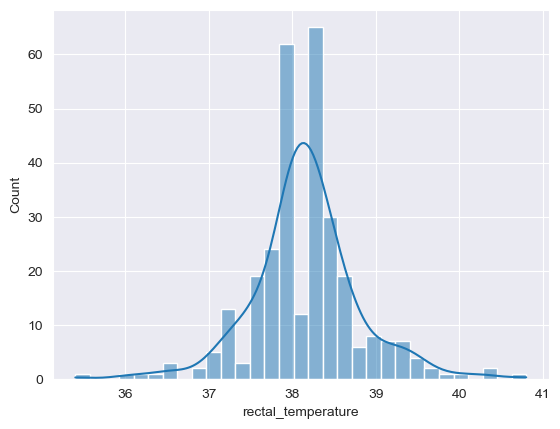

In [60]:
sns.histplot(x = 'rectal_temperature', data = fill_df, kde = True);

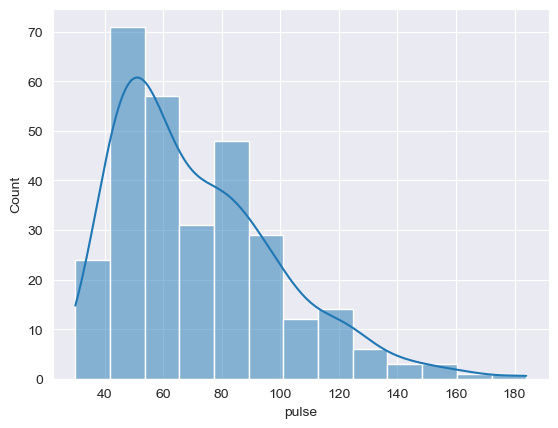

In [59]:

sns.histplot(x = 'pulse', data = fill_df, kde = True);

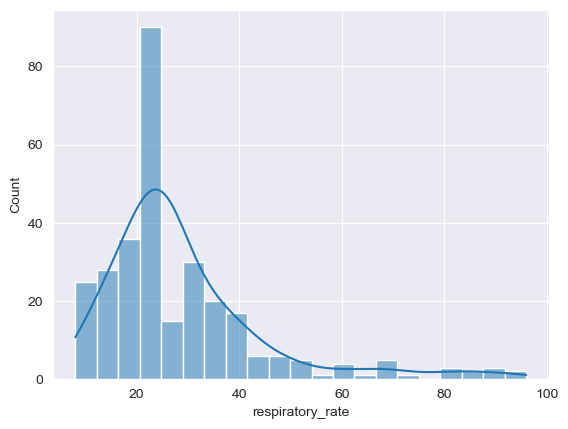

In [61]:

sns.histplot(x = 'respiratory_rate', data = fill_df, kde = True);

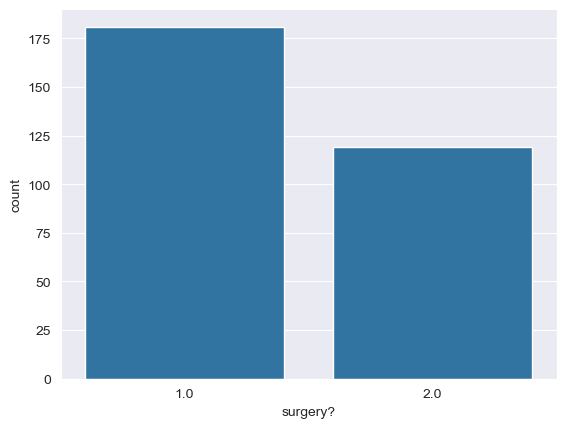

In [54]:

sns.countplot(x = 'surgery?', data = fill_df);

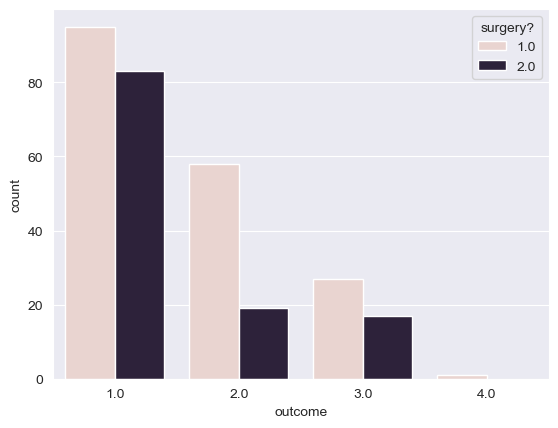

In [63]:

sns.countplot(x = 'outcome', data = fill_df, hue = 'surgery?', dodge = True);

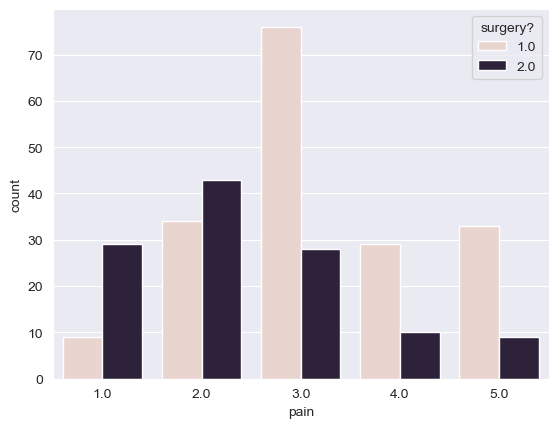

In [64]:

sns.countplot(x = 'pain', data = fill_df, hue = 'surgery?', dodge = True);

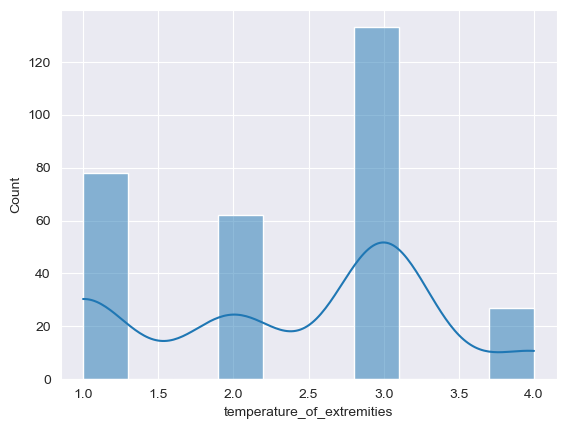

In [65]:

sns.histplot(x = 'temperature_of_extremities', data = fill_df, kde = True);

In [71]:

fill_df_max = fill_df.select_dtypes(include='number').max()
fill_df_min = fill_df.select_dtypes(include='number').min()
fill_df_range = fill_df_max - fill_df_min
fill_df_mean = fill_df.select_dtypes(include='number').mean()
fill_df_mode = fill_df.select_dtypes(include='number').mode()
fill_df_median = fill_df.select_dtypes(include='number').median()
fill_df_std = fill_df.select_dtypes(include='number').std()
fill_df_var = fill_df.select_dtypes(include='number').var()

fill_df_quantile_1_3 = fill_df.select_dtypes(include='number').quantile([0.25, 0.75])
fill_df_quantile_random = fill_df.select_dtypes(include='number').quantile(0.33)
fill_df_quantile_1 = fill_df.select_dtypes(include='number').quantile(0.25)
fill_df_quantile_3 = fill_df.select_dtypes(include='number').quantile(0.75)
fill_iqr = fill_df_quantile_3 - fill_df_quantile_1

fill_lower_bound = fill_df_quantile_1 - 1.5 * fill_iqr
fill_upper_bound = fill_df_quantile_3 + 1.5 * fill_iqr

print(
      f'Максимальные значения: {fill_df_max}\n'
      f'Минимальные значения: {fill_df_min}\n'
      f'Размах: {fill_df_range}\n'
      f'Средние значения: {fill_df_mean}\n'
      f'Мода: {fill_df_mode}\n'
      f'Медиана: {fill_df_median}\n'
      f'Стандартное отклонение: {fill_df_std}\n'
      f'Дисперсия: {fill_df_var}\n'
      f'Квантиль 0.33: {fill_df_quantile_random}\n'
      f'Квантиль 0.25: {fill_df_quantile_1}\n'
      f'Квантиль 0.75: {fill_df_quantile_3}\n'
      f'IQR: {fill_iqr}\n'
      )

Максимальные значения: surgery?                        2.0
Age                             2.0
rectal_temperature             40.8
pulse                         184.0
respiratory_rate               96.0
temperature_of_extremities      4.0
pain                            5.0
outcome                         4.0
dtype: float64
Минимальные значения: surgery?                       1.0
Age                            1.0
rectal_temperature            35.4
pulse                         30.0
respiratory_rate               8.0
temperature_of_extremities     1.0
pain                           1.0
outcome                        1.0
dtype: float64
Размах: surgery?                        1.0
Age                             1.0
rectal_temperature              5.4
pulse                         154.0
respiratory_rate               88.0
temperature_of_extremities      3.0
pain                            4.0
outcome                         3.0
dtype: float64
Средние значения: surgery?                    